<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Subsurface Machine Learning with Tree-based Gradient Boosting Regressor Methods

### Tree-based Gradient Boosting for Subsurface Modeling in Python 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

### PGE 383 Exercise: Simple Demonstration of Tree-based Gradient Boosting Regressors for Subsurface Modeling in Python 

Here's a simple workflow, demonstration of tree-based gradient boosting for subsurface modeling workflows. This should help you get started with building subsurface models that data analytics and machine learning. Here's some basic details about tree-based gradient boosting.  

#### Boosting Methods

Boosting applies mulitple week learners to build a stronger learner

* a weak learner is one that offers predictions just marginally better than random selection

I'll explain the method with words and then with equations.

* build a simple model with a high error rate, the model can be be quite inaccurate, but moves in the correct direction

* calculate the error from the model

* fit another model to the error

* calculate the error from this addition of the first and second model

* repeat until the desired accuracy is obtained or some other stopping criteria

The general workflow for predicting $Y$ from $X_1,\ldots,X_m$ is:

* build a week learner to predict $Y$ from $X_1,\ldots,X_m$, $\hat{F}_k(X)$ from the training data $x_{i,j}$.

* loop over number of desired estimators, $k = 1,\ldots,K$

    1. calculate the residuals at the the training data, $h_k(x_{i}) = y_i - \hat{F}_k(x_{i})$

    2. fit another week learner to predict $h_k$ from $X_1,\ldots,X_m$, $\hat{F}_k(X)$ from the training data $x_{i,j}$.

We have a hiearchy of simple $K$ models. 

* each model builds on the previous to improve the accuracy

Our regression estimator is the summation over the $K$ simple models.

\begin{equation}
\hat{Y} =\sum_{k=1}^{K} F_k(X_1,\ldots,X_m)
\end{equation}

#### Gradient Boosting Methods

If you look at the previous method, it becomes clear that it could be mapped to a gradient descent problem

At each step, $k$, a model is being fit, then the error is calculated, $h_k(X_1,\ldots,X_m).

We can assign a loss function

\begin{equation}
L\left(y,F(X)\right) = \frac{\left(y - F(X)\right)^2}{2}
\end{equation}

So we want to minimize the $\ell2$ loos function:

\begin{equation}
J = \sum_{i=1}^{n} L\left(y_i, F_k(X) \right)
\end{equation}

by adjusting our model result over our training data $F(x_1), F(x_2),\ldots,F(x_n)$.

We can take the partial derivative of the error vs. our model. 

\begin{equation}
\frac{\partial J}{\partial F(x_i)} = F(x_i) - y_i
\end{equation}

We can interpret the residuals as negative gradients.

\begin{equation}
y_i - F(x_i) = -1 \frac{\partial J}{\partial F(x_i)} 
\end{equation}

So now we have  a gradient descent problem:

\begin{equation}
F_{k+1}(X_i) = F_k(X_i) + h(X_i)
\end{equation}

\begin{equation}
F_{k+1}(X_i) = F_k(X_i) + y_i - F_k(X_i)
\end{equation}

\begin{equation}
F_{k+1}(X_i) = F_k(X_i) - 1 \frac{\partial J}{\partial F_k(X_i)}
\end{equation}

Of the general form:

\begin{equation}
\phi_{k+1} = \phi_k - \rho \frac{\partial J}{\partial \phi_k}
\end{equation}

where $phi_k$ is the current state, $\rho$ is the learning rate, $J$ is the loss function, and $\phi_{k+1}$ is the next state of our estimator.

If we consider our residual at training data to be a gradient then we are performing gradient descent.  

* fitting a series of models to negative gradients

By approaching the problem as a gradient decent problem we are able to apply a variety of loss functions

* $\ell2$ is our $\frac{\left(y - F(X)\right)^2}{2}$ is practical, but is not robust with outliers

\begin{equation}
- 1 \frac{\partial J}{\partial F_k(X_i)} = y_i - F_k(X_i)
\end{equation}

* $\ell1$ is our $|y - F(X)|$ is more robust with outliers

\begin{equation}
- 1 \frac{\partial J}{\partial F_k(X_i)} = sign(y_i - F_k(X_i))
\end{equation}

* there are others like Huber Loss

#### Classification

The response is a finite set of possible catergories.  

* For each training data the truth is 100% probability in the observed category and 0% otherwise

* Estimate the probability of each category with the a decision tree

* Use a measure of difference between the true and estimated distributions as the loss function to minimize

#### Tree-based Boosting Methods

Machine learning method for supervised learning for classification and regression analysis. Here are some key aspects of random forest.

**Prediction**

* estimate a function $\hat{f}$ such that we predict a response feature $Y$ from a set of predictor features $X_1,\ldots,X_m$. 

* the prediction is of the form $\hat{Y} = \hat{f}(X_1,\ldots,X_m)$ 

**Supervised Learning**

* the response feature label, $Y$, is available over the training and testing data
    
**Hiearchical, Binary Segmentation of the Feature Space**

The fundamental idea is to divide the predictor space, $𝑋_1,\ldots,X_m$, into $J$ mutually exclusive, exhaustive regions

* **mutually exclusive** – any combination of predictors only belongs to a single region, $R_j$

* **exhaustive** – all combinations of predictors belong a region, $R_j$, regions cover entire feature space (range of the variables being considered)

For every observation in a region, $R_j$, we use the same prediction, $\hat{Y}(R_j)$    

For example predict production, $\hat{Y}$, from porosity, ${X_1}$

* given the data within a mD feature space, $X_1,\ldots,X_m$, find that boundary maximizes the gap between the two categories

* new cases are classified based on where they fall relative to this boundary 
 
**Proceedure for Tree Construction**

The tree is constructed from the top down.  We begin with a sigle region that covers the entire feature space and then proceed with a sequence of splits.

* **Scan All Possible Splits** over all regions and over all features.

* **Greedy Optimization**  The method proceeds by finding the first segmentation (split) in any feature that minimizes the residual sum of squares of errors over all the training data $y_i$ over all of the regions $j = 1,\ldots,J$.

\begin{equation}
RSS = \sum^{J}_{j=1} \sum_{i \in R_j} (y_i - \hat{y}_{R_j})^2
\end{equation}

* **Stopping Criteria** is typically based on minimum number of training data in each region for a robust estimation and / or minimum reduction in RSS for the next split 

**Interpretability**

Compared to decision trees, the ensemble methods have reduced interpretability.  One tool to improve model interpretability is feature importance.

We calculate variable importance through calculating the average of:

* residual sum of square reduction for all splits involving each predictor feature for regression

* the decrease in the Gini index for all splits involving each predictor feature for classification

Both are standardized to sum to 1.0 over the features.

##### Applications to Subsurface Modeling

We will predict unconventional well production from a single petrophysical and geomechanical predictor feature

##### Why Cover Ensemble Methods with Tree-based Gradient Boosting?

Here's some thoughts:

* build on from easy to understand decision trees
* demonstrate reduction in model variance through an ensemble approach
* random forest is quite powerful and is a top performing machine learning method in various types of problems 

#### Workflow Goals

Learn the basics of ensemble tree methods in python to segment facies given petrophysical properties. This includes:

* Loading and visualizing sample data
* Trying out bagging tree and random forest 
* Test and observe the model behavoir and prove concepts

#### Objective 

In the PGE 383: Stochastic Subsurface Modeling class I want to provide hands-on experience with building subsurface modeling workflows. Python provides an excellent vehicle to accomplish this. I have coded a package called GeostatsPy with GSLIB: Geostatistical Library (Deutsch and Journel, 1998) functionality that provides basic building blocks for building subsurface modeling workflows. 

The objective is to remove the hurdles of subsurface modeling workflow construction by providing building blocks and sufficient examples. This is not a coding class per se, but we need the ability to 'script' workflows working with numerical methods.    

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You will need to copy the data file to your working directory.  They are available here:

* Tabular data - 12_sample_data.csv found [here](https://github.com/GeostatsGuy/GeoDataSets/blob/master/12_sample_data.csv).

There are exampled below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

#### Import Required Packages

We will also need some standard packages. These should have been installed with Anaconda 3.

#### Load the required libraries

The following code loads the required libraries.

In [1]:
import os                                                   # to set current working directory 
import math                                                 # basic calculations like square root
from sklearn import tree                                    # tree program from scikit learn (package for machine learning)
from sklearn.tree import _tree                              # for accessing tree information
from sklearn import metrics                                 # measures to check our models
from sklearn.tree import export_graphviz                    # graphical visualization of trees
from sklearn.preprocessing import StandardScaler            # standardize variables to mean of 0.0 and variance of 1.0

from sklearn.model_selection import cross_val_score         # cross validation methods
from sklearn.tree import DecisionTreeRegressor              # decision tree method
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor      # tree-based gradient boosting

import pandas as pd                                         # DataFrames and plotting
import pandas.plotting as pd_plot
import numpy as np                                          # arrays and matrix math
import matplotlib.pyplot as plt                             # plotting
from subprocess import check_call
import geostatspy.GSLIB as GSLIB                            # geostatistics and spatial methods

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare functions

Let's define a couple of functions to streamline plotting correlation matrices and visualization and test our regression models. 

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).


In [2]:
#os.chdir("c:/PGE383")                                       # set the working directory

#### Generate a Data Set

Let's make a simple synthetic dataset with a single predictor feature and response feature.

* we will build an additive model with a random component and a cyclic component

In [3]:
nsample = 20                                                # number of data values
np.random.seed(63079)                                       # random number seed for a consistent model      
wt_random = 0.3                                             # weights for the random and cyclic components (sum to 1.0)
wt_cycle = 0.7
x = np.linspace(0,100,20)                                   # make a set of values to evaluate our models
Y = (wt_random*np.random.rand(nsample) + wt_cycle*np.sin(x/10)+1.0)*0.5

indices = np.random.permutation(x.shape[0])                 # get the indicies for randomize the order of the values
training_idx, test_idx = indices[:int(nsample*4/5)], indices[int(nsample*4/5):] # extract 80% training and 20% testing
x_train, x_test = x[training_idx], x[test_idx]             
Y_train, Y_test = Y[training_idx], Y[test_idx]

Let's visualize our synthetic dataset.

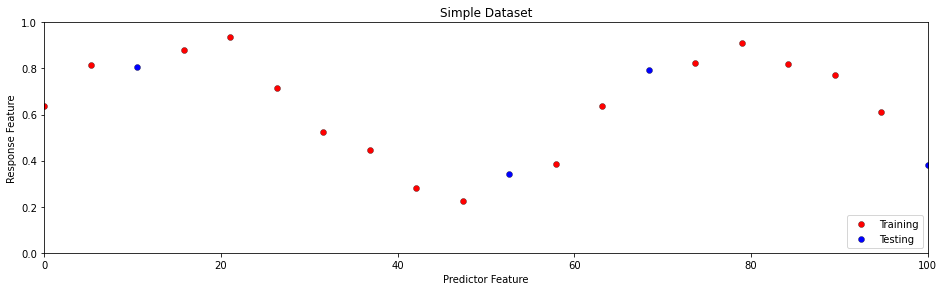

In [4]:
plt.subplot(121)                                            # plot jackknife results for all cases
plt.scatter(x_train,Y_train,s=None, c='red', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=1.0, linewidths=0.3, edgecolors="black", label = "Training")
plt.scatter(x_test,Y_test,s=None, c='blue', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=1.0, linewidths=0.3, edgecolors="black", label = "Testing")

plt.title('Simple Dataset'); plt.xlabel('Predictor Feature'); plt.ylabel('Response Feature')
plt.xlim(0,100); plt.ylim(0,1.0); plt.legend(loc='lower right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=4.5, top=0.8, wspace=0.2, hspace=0.2)
plt.show()

#### Build a Tree-based Boosting Model Sequentially

Let's build a tree based boosting model sequentially.

* Visualize the model fitting to the training data in original feature space 

* Visualize the model fitting to the training data in the feature residual space

#### Tree-based Boosting Model in Original Feature Space

We will start in original feature space for $1,\dots,12$ trees.


Complete of 12:  1,  2,  3,  4,  5,  6,  7,  8,  9,  10,  11,  12,  

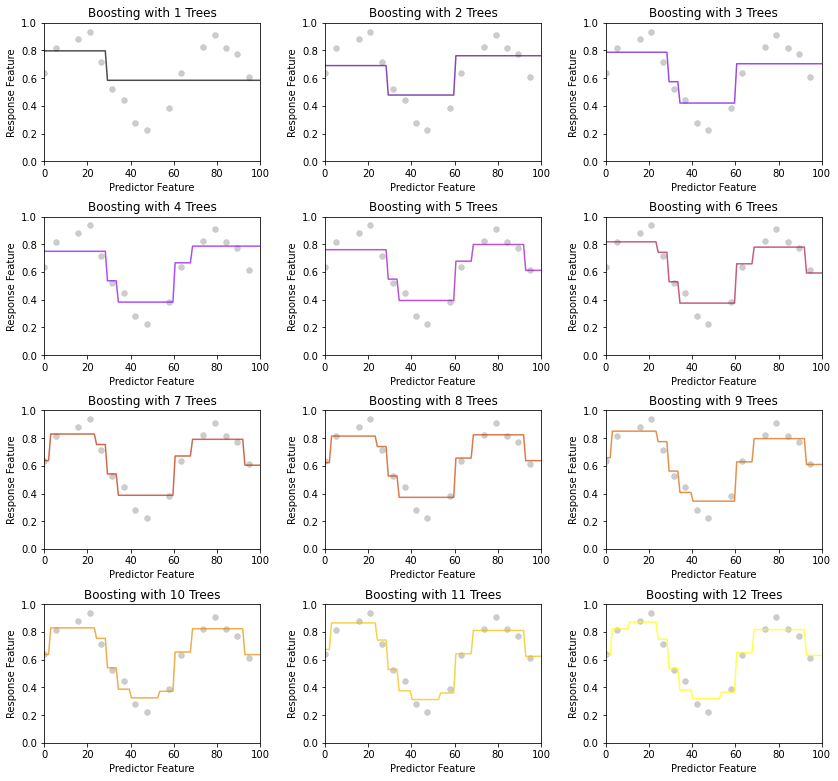

In [5]:
import warnings
warnings.filterwarnings('ignore')                           # suppress warnings

ntrees = 12                                                 # number of estimators / trees for our boosting model

params = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 1,                       
    'learning_rate': 1,
    'criterion': 'mse'                                      # tree construction criteria is mean square error over training
}

num_trees = np.linspace(1,12,ntrees)                        # build a list of numbers of trees 
boosting_models = []; score = []; pred = []                 # arrays for storage of models and model summaries
x_pred = np.linspace(0,100,100)

cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, ntrees)]

index = 1
print('Complete of ' + str(len(num_trees)) + ': ', end =" ")
for num_tree in num_trees:                                  # loop over number of trees
    boosting_models.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params))
    boosting_models[index-1].fit(X = x_train.reshape(-1, 1), y = Y_train)
    score.append(boosting_models[index-1].score(X = x_test.reshape(-1, 1), y = Y_test))
    Y_pred = boosting_models[index-1].predict(x_pred.reshape(-1, 1))
    plt.subplot(4,3,index)
    plt.scatter(x_train,Y_train,s=None, c='black', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=0.3, edgecolors="black", label = "Training")
    plt.plot(x_pred,Y_pred, c=colors[index-1], alpha=0.7, label = "Testing") 
    plt.title('Boosting with ' + str(int(num_trees[index-1])) + ' Trees' ); plt.xlabel('Predictor Feature'); plt.ylabel('Response Feature')
    plt.xlim(0,100); plt.ylim(0,1.0); 
    print(str(index)+ ', ', end =" ") 
    index = index + 1
    
#plt.legend(loc='lower right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=2.5, wspace=0.3, hspace=0.4)
plt.show()    

Observe the additive nature of the boosting model.

* this is due to the fitting of residuals from the previous model

* we are fitting the model error from the previous models

We can actually visualize the model fits with the training data and model residuals.


#### Tree-based Boosting Model in Feature Residual Space

We will start in feature residual space for $1,\dots,12$ trees.


Complete of 12:  1,  2,  3,  4,  5,  6,  7,  8,  9,  10,  11,  12,  

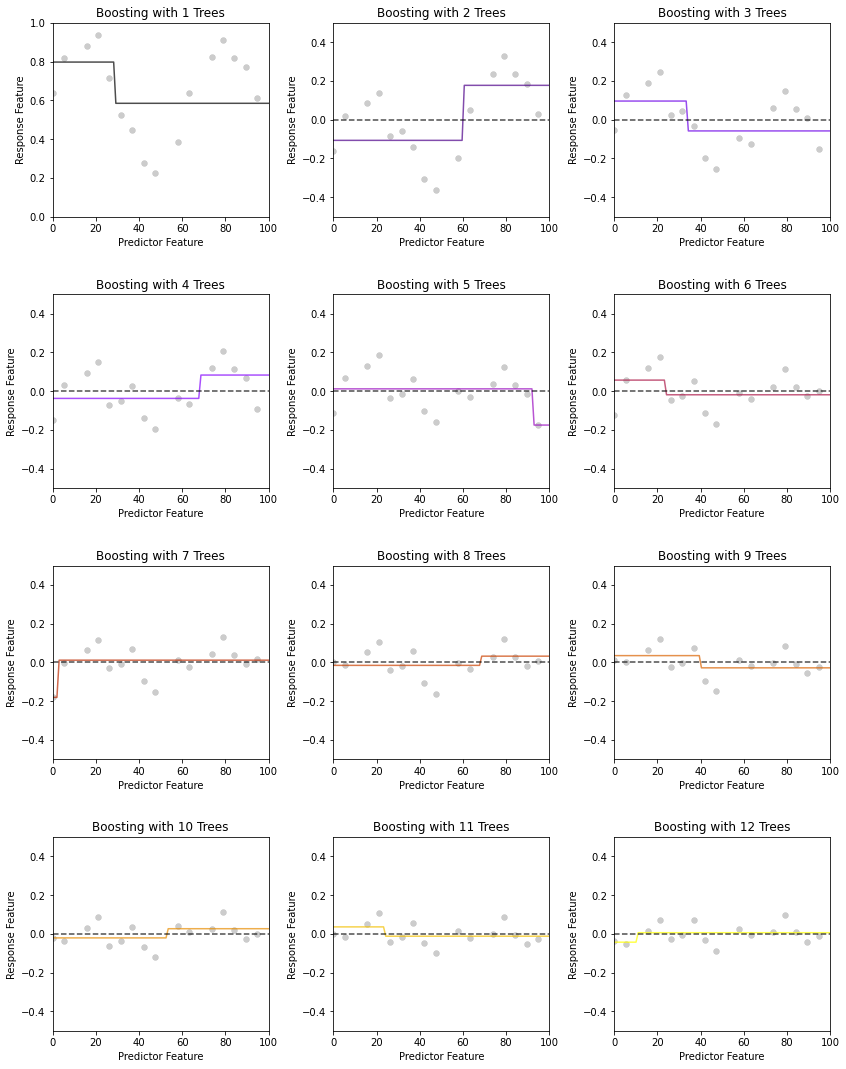

In [6]:
import warnings
warnings.filterwarnings('ignore')                           # suppress warnings

ntrees = 12

params = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 1,                       
    'learning_rate': 1,
    'criterion': 'mse'                                      # tree construction criteria is mean square error over training
}

num_trees = np.linspace(1,12,ntrees)                              # build a list of numbers of trees 
boosting_models = []; score = []; pred = []                 # arrays for storage of models and model summaries
x_pred = np.linspace(0,100,100)

cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, ntrees)]
Y_zero = np.zeros(100)

index = 1
print('Complete of ' + str(len(num_trees)) + ': ', end =" ")
for num_tree in num_trees:                                  # loop over number of trees
    boosting_models.append(GradientBoostingRegressor(n_estimators=int(num_tree),**params))
    boosting_models[index-1].fit(X = x_train.reshape(-1, 1), y = Y_train)
    Y_pred = boosting_models[index-1].predict(x_pred.reshape(-1, 1))
    if index == 1:
        Y_pred_prev = np.zeros(100)
    else:
        Y_pred_prev = boosting_models[index-2].predict(x_pred.reshape(-1, 1))
    Y_train_pred = boosting_models[index-1].predict(x_train.reshape(-1, 1))
    if index == 1:
        Y_train_pred_prev = np.zeros(x_train.shape[0])
    else:
        Y_train_pred_prev = boosting_models[index-2].predict(x_train.reshape(-1, 1))
    plt.subplot(4,3,index)
    plt.scatter(x_train,Y_train-Y_train_pred_prev,s=None, c='black', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=0.3, edgecolors="black", label = "Training")
    plt.plot(x_pred,Y_pred-Y_pred_prev, c=colors[index-1], alpha=0.7, label = "Testing") 
    plt.title('Boosting with ' + str(int(num_trees[index-1])) + ' Trees' ); plt.xlabel('Predictor Feature'); plt.ylabel('Response Feature')
    if index == 1:
        plt.xlim(0,100); plt.ylim(0,1.0); 
    else:
        plt.xlim(0,100); plt.ylim(-0.5,0.5); 
        plt.plot(x_pred,Y_zero, c='black', alpha=0.7, linestyle='dashed', label = "Testing") 
    print(str(index)+ ', ', end =" ") 
    index = index + 1    

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=3.5, wspace=0.3, hspace=0.4)
plt.show()   

Observations:

* See the initial model and then working with residuals.

* See the residual from $k$ fit by the $k+1$ model

* See the reduction in residual magnitude as the number boosting trees increases

#### Comments

This was a simple demonstration of tree-based boosting. 

I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
